In [ ]:
'''
서론
음성 데이터 분석의 중요성
주요 응용 분야

기초 개념
음성 신호의 특성
샘플링과 양자화
디지털 신호 처리 기본 개념

음성 데이터 수집
데이터 수집 방법
마이크 및 녹음 장비 선택
데이터 전처리 (노이즈 제거 등)

음성 데이터 전처리
신호 정규화
필터링
음성 분할 및 라벨링

특징 추출
시간 도메인 특징 (예: 에너지, 제로 크로싱 비율)
주파수 도메인 특징 (예: 푸리에 변환, 스펙트로그램)
MFCC (Mel-Frequency Cepstral Coefficients)

음성 인식
음성 인식 개요
Hidden Markov Model (HMM)
Deep Learning 기반 음성 인식 (예: RNN, LSTM, Transformer)

음성 합성
음성 합성 개요
Text-to-Speech (TTS) 시스템
WaveNet 및 최신 기술

응용 및 프로젝트
음성 비서 개발
감정 인식
음성 기반 챗봇
'''

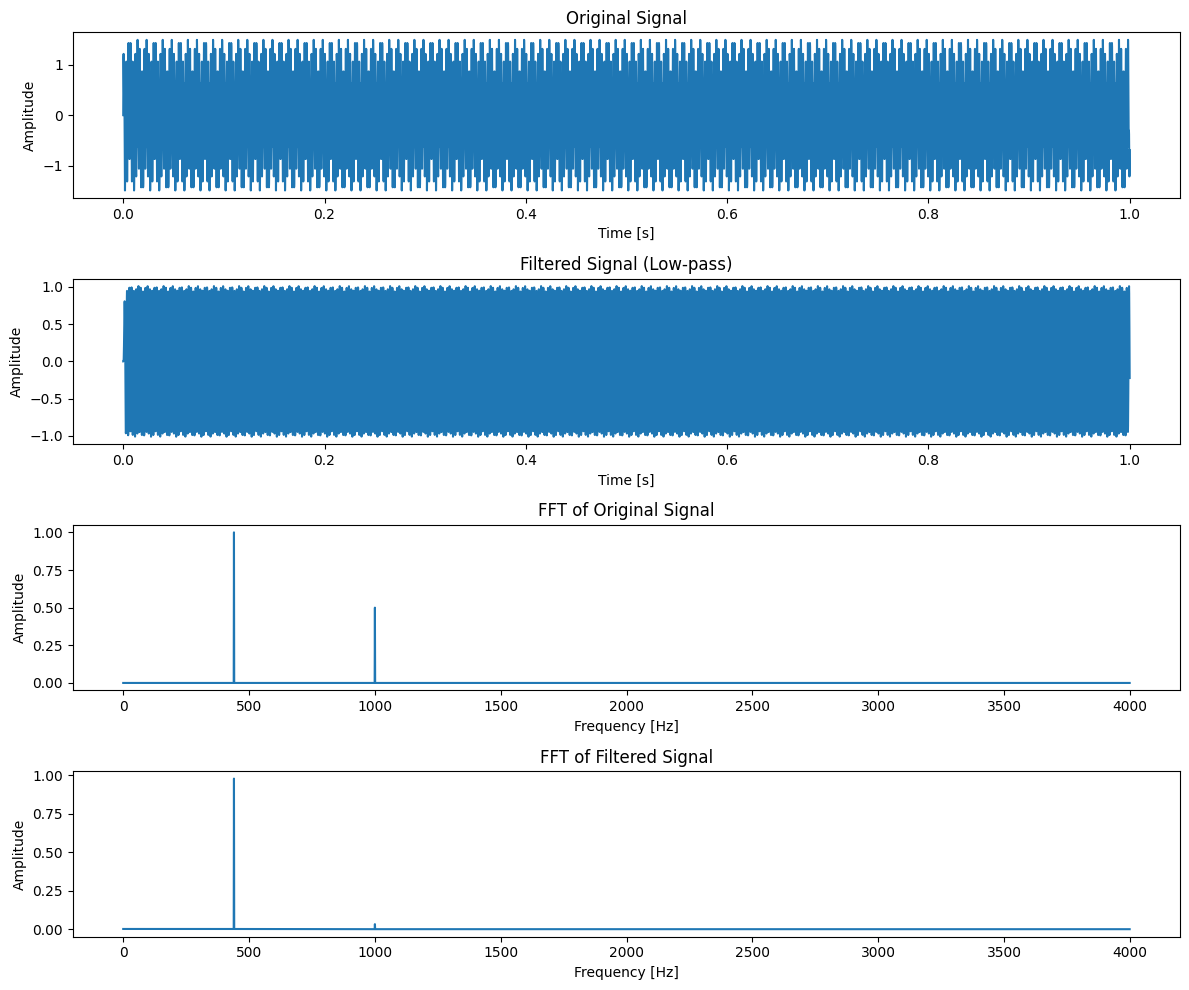

In [ ]:
'''
1. 음성 신호의 특성
음성 신호는 시간에 따라 변하는 연속적인 아날로그 신호입니다. 주요 특성으로는 진폭(amplitude), 주파수(frequency), 위상(phase) 등이 있습니다.

진폭: 신호의 세기를 나타내며, 소리의 크기를 결정합니다.
주파수: 신호의 반복 주기를 나타내며, 소리의 높낮이를 결정합니다.
위상: 신호의 시작점을 나타내며, 소리의 위치를 결정합니다.

2. 샘플링과 양자화
아날로그 음성 신호를 디지털 신호로 변환하기 위해 샘플링과 양자화 과정을 거칩니다.

샘플링: 아날로그 신호를 일정한 시간 간격으로 측정하여 이산적인 값으로 변환하는 과정입니다. 샘플링 주파수는 초당 샘플링 횟수를 나타냅니다.

CD 품질의 음악은 44.1kHz로 샘플링됩니다. 이는 1초에 44,100번 소리의 세기를 측정한다는 의미입니다. 이렇게 많은 샘플을 통해 원래 아날로그 신호에 가까운 디지털 신호를 얻을 수 있습니다.

양자화: 샘플링된 값을 일정한 비트 수로 표현하는 과정입니다. 양자화 비트 수가 높을수록 신호의 정밀도가 높아집니다.

CD 품질의 음악은 16비트로 양자화됩니다. 이는 각 샘플 값을 2^16 (즉, 65,536) 단계로 표현한다는 의미입니다. 더 많은 비트 수를 사용하면 더 정밀한 소리를 얻을 수 있습니다.

3. 디지털 신호 처리 기본 개념
디지털 신호 처리는 디지털화된 음성 신호를 분석하고 변환하는 과정입니다. 주요 개념으로는 필터링, 푸리에 변환 등이 있습니다.

필터링: 특정 주파수 대역의 신호를 제거하거나 강조하는 과정입니다.

전화 통화 중 배경 소음을 줄이기 위해 저주파 필터를 사용하여 저주파 소음을 제거할 수 있습니다.

푸리에 변환: 시간 도메인 신호를 주파수 도메인으로 변환하여 신호의 주파수 성분을 분석하는 방법입니다.

음악의 주파수 스펙트럼을 분석하여 특정 악기의 소리를 강조하거나 제거할 수 있습니다. 예를 들어, DJ가 믹싱할 때 특정 주파수 대역을 강조하여 음악의 특정 부분을 부각시킬 수 있습니다.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter

# 샘플링 주파수와 시간 설정
sampling_rate = 8000  # 8kHz
duration = 1  # 1초
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# 아날로그 신호 생성 (예: 440Hz와 1000Hz의 사인파 합성)
freq1 = 440  # 440Hz
freq2 = 1000  # 1000Hz
amplitude = 1
signal = amplitude * (np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t))

# 저주파 필터 설계 (예: 600Hz 이하 통과)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff_frequency = 600  # 600Hz
filtered_signal = lowpass_filter(signal, cutoff_frequency, sampling_rate)

# 푸리에 변환
def plot_fft(signal, sampling_rate, title):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

# 원본 신호와 필터링된 신호 시각화
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Low-pass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plot_fft(signal, sampling_rate, 'FFT of Original Signal')

plt.subplot(4, 1, 4)
plot_fft(filtered_signal, sampling_rate, 'FFT of Filtered Signal')

plt.tight_layout()
plt.show()



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


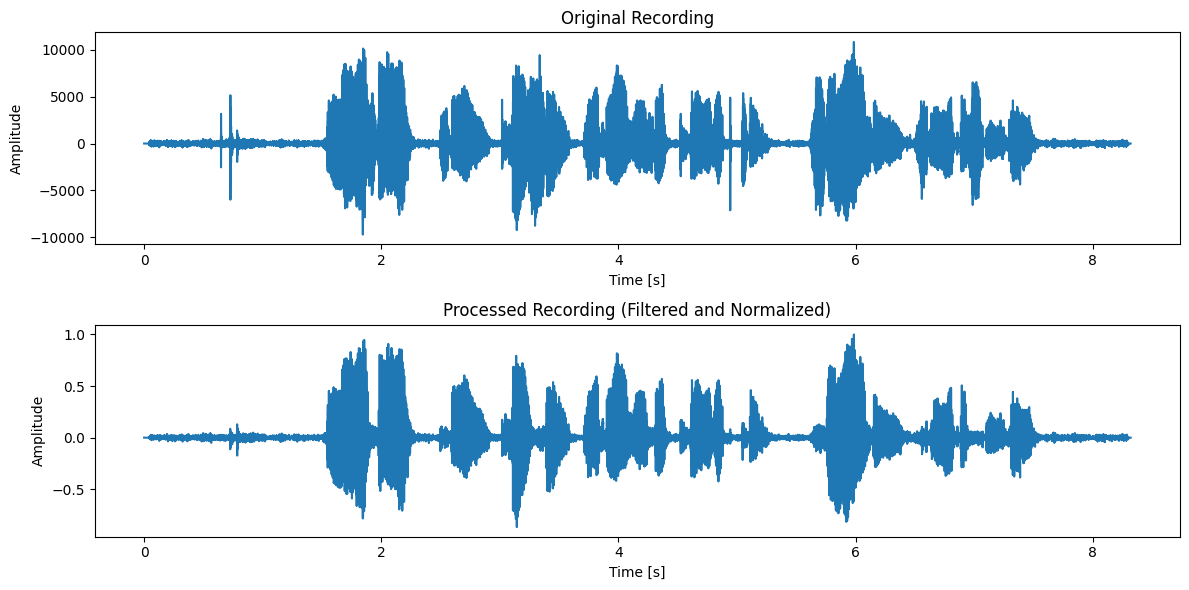

In [ ]:
'''
최대 진폭으로 정규화 하는 이유

1. 일관된 신호 크기 유지
음성 신호의 진폭은 녹음 환경이나 장비에 따라 크게 달라질 수 있습니다. 최대 진폭으로 정규화하면 모든 신호의 크기를 일정하게 맞출 수 있어, 후속 처리나 분석 과정에서 일관성을 유지할 수 있습니다.

2. 신호의 동적 범위 최적화
정규화를 통해 신호의 진폭을 -1과 1 사이로 맞추면, 신호의 동적 범위를 최적화할 수 있습니다. 이는 특히 신경망과 같은 머신러닝 모델에서 중요한데, 모델이 입력 신호의 범위를 예상할 수 있기 때문입니다.

3. 계산의 안정성 향상
정규화된 신호는 계산 과정에서 오버플로우나 언더플로우를 방지할 수 있습니다. 이는 특히 푸리에 변환이나 필터링과 같은 신호 처리 과정에서 중요한 역할을 합니다.

4. 노이즈 감소
정규화를 통해 신호의 진폭을 일정하게 맞추면, 상대적으로 작은 노이즈가 신호에 미치는 영향을 줄일 수 있습니다. 이는 신호의 품질을 향상시키는 데 도움이 됩니다.
'''
!pip install pydub
!apt-get install ffmpeg

from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# file이름 확장자 argument로 지정
audio = AudioSegment.from_file("voice_file.m4a") # 카카오 음성녹음파일로 테스트하면됨
samples = np.array(audio.get_array_of_samples())

# 샘플링 주파수 설정
sampling_rate = audio.frame_rate

# 노이즈 제거 (저주파 필터)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff_frequency = 3000  # 3kHz
filtered_samples = lowpass_filter(samples, cutoff_frequency, sampling_rate)

# 정규화
normalized_samples = filtered_samples / np.max(np.abs(filtered_samples))

# 원본 신호와 전처리된 신호 시각화
t = np.linspace(0, len(samples) / sampling_rate, num=len(samples))

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, samples)
plt.title('Original Recording')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, normalized_samples)
plt.title('Processed Recording (Filtered and Normalized)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


<ipython-input-7-086fa3910482>:41: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))


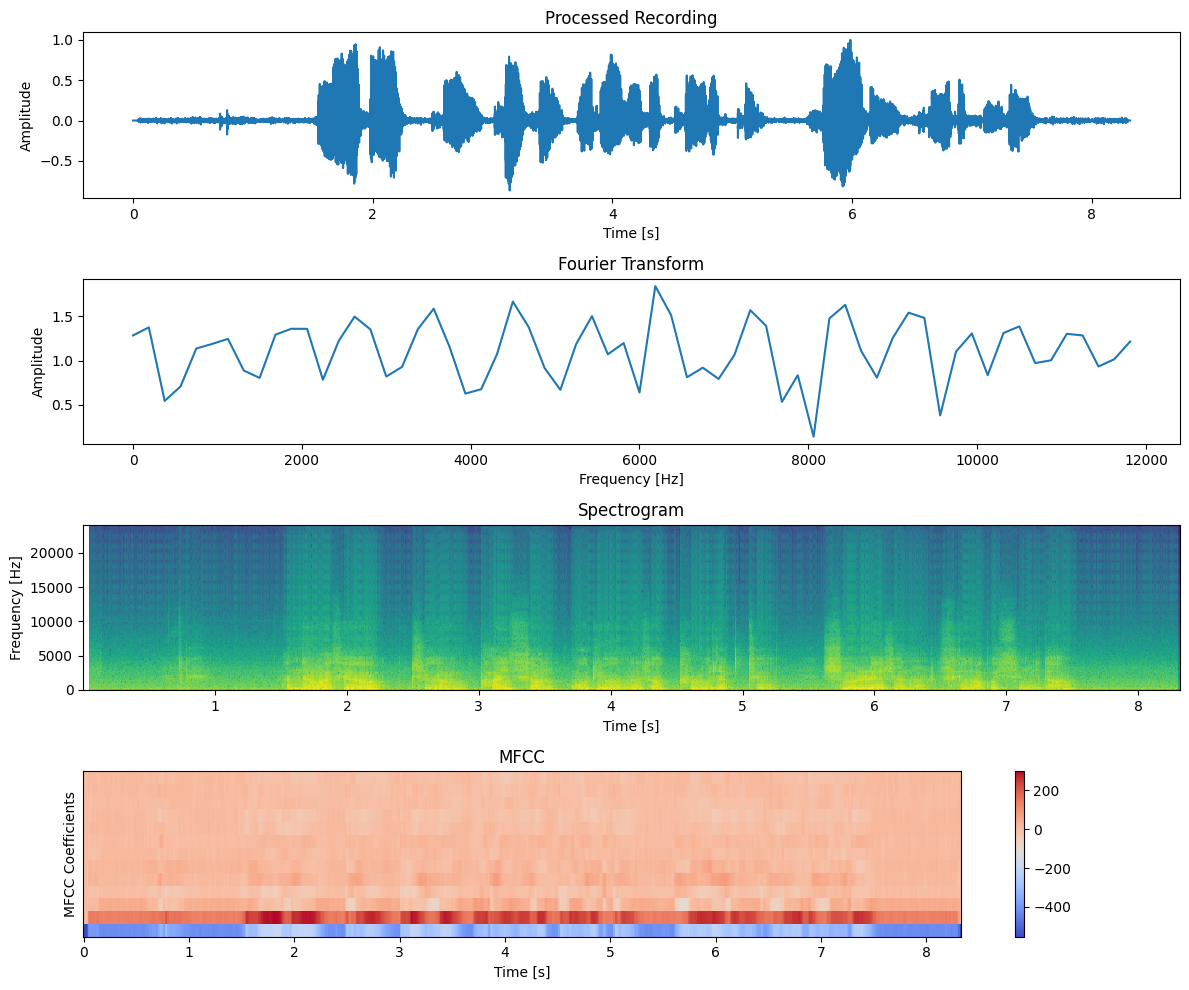

Energy: 7668.319872434987
Zero Crossing Rate: 8505.5


In [ ]:
'''
특징추출

1. 시간 도메인 특징
시간 도메인 특징은 신호의 시간적 변화를 분석하는 방법입니다.

에너지 (Energy)
에너지는 신호의 세기를 나타내며, 신호의 전체적인 크기를 측정합니다.
에너지는 신호의 제곱합으로 계산됩니다.

제로 크로싱 비율 (Zero Crossing Rate)
제로 크로싱 비율은 신호가 0을 교차하는 횟수를 나타냅니다.
이는 신호의 주파수 성분을 간접적으로 나타낼 수 있습니다.

2. 주파수 도메인 특징
주파수 도메인 특징은 신호의 주파수 성분을 분석하는 방법입니다.

푸리에 변환 (Fourier Transform)
푸리에 변환은 시간 도메인 신호를 주파수 도메인으로 변환하여 신호의 주파수 성분을 분석합니다.

스펙트로그램 (Spectrogram)
스펙트로그램은 시간에 따른 주파수 성분의 변화를 시각화한 것입니다.
이는 신호의 주파수 성분이 시간에 따라 어떻게 변하는지 보여줍니다.

3. MFCC (Mel-Frequency Cepstral Coefficients)
MFCC는 음성 신호의 주파수 성분을 분석하여 인간의 청각 시스템을 모방한 특징을 추출하는 방법입니다.
이는 음성 인식 시스템에서 널리 사용됩니다.
'''

from scipy.fft import fft
from scipy.signal import spectrogram
import librosa
import librosa.display

# 시간 도메인 특징: 에너지
energy = np.sum(normalized_samples ** 2)

# 시간 도메인 특징: 제로 크로싱 비율
zero_crossings = np.sum(np.abs(np.diff(np.sign(normalized_samples)))) / 2

# 주파수 도메인 특징: 푸리에 변환
fft_signal = fft(normalized_samples)
frequencies = np.fft.fftfreq(len(fft_signal), 1 / sampling_rate)

# 주파수 도메인 특징: 스펙트로그램
frequencies, times, Sxx = spectrogram(normalized_samples, fs=sampling_rate)

# MFCC
mfccs = librosa.feature.mfcc(y=normalized_samples, sr=sampling_rate, n_mfcc=13)

# 시각화
plt.figure(figsize=(12, 10))

# 원본 신호
plt.subplot(4, 1, 1)
plt.plot(t, normalized_samples)
plt.title('Processed Recording')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# 푸리에 변환
plt.subplot(4, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(frequencies)//2])
plt.title('Fourier Transform')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

# 스펙트로그램
plt.subplot(4, 1, 3)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

# MFCC
plt.subplot(4, 1, 4)
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time [s]')
plt.ylabel('MFCC Coefficients')

plt.tight_layout()
plt.show()

print(f"Energy: {energy}")
print(f"Zero Crossing Rate: {zero_crossings}")


In [ ]:
'''
Hidden Markov Model (HMM)
HMM은 음성 인식에서 오랫동안 사용된 통계적 모델입니다. HMM은 시간에 따라 변하는 시스템을 모델링하는 데 사용됩니다.
음성 인식에서는 음성 신호의 시간적 변화를 모델링하는 데 유용합니다.

HMM의 주요 구성 요소
상태 (States): 시스템이 가질 수 있는 다양한 상태를 나타냅니다.
전이 확률 (Transition Probabilities): 한 상태에서 다른 상태로 전이될 확률을 나타냅니다.
관측 확률 (Observation Probabilities): 각 상태에서 특정 관측이 발생할 확률을 나타냅니다.
Deep Learning 기반 음성 인식
최근에는 딥러닝 기술이 음성 인식에서 큰 성과를 거두고 있습니다.
특히 RNN, LSTM, Transformer와 같은 모델이 음성 인식에 널리 사용됩니다.

RNN (Recurrent Neural Network)
RNN은 순환 구조를 가진 신경망으로, 시간에 따른 데이터의 순차적 특성을 모델링하는 데 유용합니다.
음성 신호와 같은 시계열 데이터를 처리하는 데 적합합니다.

LSTM (Long Short-Term Memory)
LSTM은 RNN의 한 종류로, 장기 의존성을 효과적으로 학습할 수 있습니다.
이는 긴 시퀀스의 데이터를 처리하는 데 유리합니다.

Transformer
Transformer는 주로 자연어 처리에서 사용되지만, 음성 인식에서도 효과적입니다.
Transformer는 셀프 어텐션 메커니즘을 사용하여 시퀀스의 모든 위치 간의 관계를 모델링합니다.
'''

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten

# 데이터 준비
X = mfccs.T[np.newaxis, ...]  # 입력 데이터 형상 조정
y = np.array([0])  # 예시를 위한 더미 레이블

# RNN 모델 정의
model = Sequential([
    SimpleRNN(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    Flatten(),
    Dense(10, activation='softmax')  # 예시를 위한 출력 레이어
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X, y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.2797
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
'''
음성 파일을 텍스트로 변환하는 작업은 상당히 복잡하며, 고도로 훈련된 모델이 필요합니다.
간단한 RNN 모델로는 정확한 결과를 얻기 어려울 수 있습니다.
대신, 이미 학습된 음성 인식 API를 사용하는 것이 더 효과적일 수 있습니다.
'''
predictions = model.predict(X)
predicted_text = "예시 텍스트"  # 예시를 위한 더미 텍스트

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Predicted Text: 예시 텍스트


In [ ]:
'''
OpenAI Whisper ( 여러가지 음성인식 오픈소스들중 하나)

Whisper는 OpenAI에서 개발한 오픈소스 음성 인식 모델로, 다양한 언어와 방언을 지원합니다.
높은 정확도를 자랑하며, 커스터마이징이 가능합니다
'''

!pip install torch torchvision torchaudio
!pip install git+https://github.com/openai/whisper.git
!pip install ffmpeg-python

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-nvyhx6oq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-nvyhx6oq
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 76, in resolve
    collected = self.factory.collect_roo

In [ ]:
import whisper
import ffmpeg

# Whisper 모델 로드
model = whisper.load_model("base")

# 오디오 파일 로드 및 전처리
audio_path = "voice_file.m4a"
audio = whisper.load_audio(audio_path)
audio = whisper.pad_or_trim(audio)

# Mel spectrogram 생성
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# 언어 감지 (선택 사항)
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# 음성 인식
options = whisper.DecodingOptions(fp16=False)
result = whisper.decode(model, mel, options)

# 결과 출력
print(result.text)


Detected language: ko
안녕하세요 지금 파이선 오디오 분석 프로젝트 심을 레이션을 생각하고 있습니다.


In [ ]:
'''
음성 합성 개요
음성 합성(Text-to-Speech, TTS)은 텍스트를 자연스러운 음성으로 변환하는 기술입니다. 이 기술은 시각 장애인을 위한 보조 도구, 언어 학습, 오디오북 제작 등 다양한 분야에서 활용됩니다1.

Text-to-Speech (TTS) 시스템
TTS 시스템은 여러 단계로 구성됩니다2:

텍스트 전처리 및 정규화: 텍스트를 표준화하고 발음 가능한 형태로 변환합니다.
텍스트 분석: 문장의 구조를 분석하여 음성의 리듬, 강조, 톤을 결정합니다.
음성 합성: 미리 녹음된 음성 조각을 연결하거나, 수학적 모델을 사용하여 음성을 생성합니다.
음질 개선: 생성된 음성의 품질을 최적화합니다.

WaveNet 및 최신 기술
WaveNet은 딥러닝을 활용한 음성 합성 모델로, 매우 자연스러운 음성을 생성할 수 있습니다.
'''
!pip install gtts

from gtts import gTTS
import os

# 변환할 텍스트
text = "안녕하세요, 이것은 텍스트를 음성으로 변환하는 예제입니다."

# TTS 객체 생성
tts = gTTS(text=text, lang='ko')

# 음성 파일 저장
tts.save("output.mp3")

# 음성 파일 재생 (선택 사항)
os.system("mpg321 output.mp3")


32512